In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

import warnings

In [99]:
df = pd.read_csv('data/vehicles.csv')

In [100]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [102]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [103]:
df2 = df.dropna()
df2.info()
#Dropping all rows that have any null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2)

In [104]:
#Find out the null values in each column, should be 0
df2.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [105]:
#drop any columns that don't impact sales and are unique to each car such as id, VIN that do not add anything to the model
#dropping state and region
df2 = df2.drop(['id','region','VIN', 'state'], axis = 1)

In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         34868 non-null  int64  
 1   year          34868 non-null  float64
 2   manufacturer  34868 non-null  object 
 3   model         34868 non-null  object 
 4   condition     34868 non-null  object 
 5   cylinders     34868 non-null  object 
 6   fuel          34868 non-null  object 
 7   odometer      34868 non-null  float64
 8   title_status  34868 non-null  object 
 9   transmission  34868 non-null  object 
 10  drive         34868 non-null  object 
 11  size          34868 non-null  object 
 12  type          34868 non-null  object 
 13  paint_color   34868 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 4.0+ MB


In [107]:
#dropping columns that are may not affect modeling
df2 = df2.drop(['cylinders', 'manufacturer', 'model', 'paint_color', 'type'], axis = 1)

In [96]:
df2.title_status.value_counts()

clean         33688
rebuilt         790
salvage         240
lien            134
missing          14
parts only        2
Name: title_status, dtype: int64

In [72]:
df2.head()

,price,year,condition,fuel,odometer,title_status,transmission,drive,size
126,0,2018.0,like new,gas,68472.0,clean,automatic,rwd,full-size
127,0,2019.0,like new,gas,69125.0,clean,automatic,rwd,full-size
128,0,2018.0,like new,gas,66555.0,clean,automatic,rwd,full-size
215,4000,2002.0,excellent,gas,155000.0,clean,automatic,fwd,compact
219,2500,1995.0,fair,gas,110661.0,clean,automatic,rwd,mid-size


In [108]:
#looking at the correlation
df2.corr()

,price,year,odometer
price,1.000000,0.254059,-0.199988
year,0.254059,1.000000,-0.219942
odometer,-0.199988,-0.219942,1.000000


In [109]:
#Transforming categorical data in columns condition, fuel, title_status, drive, transmission
df2_full =pd.get_dummies(df2, columns=["condition","fuel","title_status", "drive", "transmission", "size"])
df2_full.head()

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,...,drive_4wd,drive_fwd,drive_rwd,transmission_automatic,transmission_manual,transmission_other,size_compact,size_full-size,size_mid-size,size_sub-compact
126,0,2018.0,68472.0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
127,0,2019.0,69125.0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
128,0,2018.0,66555.0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
215,4000,2002.0,155000.0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
219,2500,1995.0,110661.0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [75]:
df2_full.corr()

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,...,drive_4wd,drive_fwd,drive_rwd,transmission_automatic,transmission_manual,transmission_other,size_compact,size_full-size,size_mid-size,size_sub-compact
price,1.000000,0.254059,-0.199988,-0.052904,-0.101943,-0.026001,0.147712,0.053054,-0.026545,0.387653,...,0.257766,-0.328728,0.058467,0.069563,-0.021880,-0.091902,-0.176885,0.301471,-0.186239,-0.059600
year,0.254059,1.000000,-0.219942,0.091372,-0.166933,-0.149387,0.125173,0.043993,-0.019995,0.026328,...,0.132187,0.032796,-0.199132,0.161915,-0.204177,0.021095,0.010835,-0.006571,0.003399,-0.013108
odometer,-0.199988,-0.219942,1.000000,-0.033674,0.117981,0.091197,-0.114376,-0.044159,0.028526,0.044920,...,0.017508,-0.004406,-0.016420,-0.001001,0.033783,-0.050001,-0.054236,0.069238,-0.033886,-0.011022
condition_excellent,-0.052904,0.091372,-0.033674,1.000000,-0.139234,-0.745119,-0.415100,-0.090377,-0.037416,-0.027189,...,0.060001,0.023832,-0.100566,-0.011229,-0.026443,0.060801,0.066811,-0.101761,0.050704,0.043896
condition_fair,-0.101943,-0.166933,0.117981,-0.139234,1.000000,-0.076593,-0.042669,-0.009290,-0.003846,-0.016946,...,-0.024706,0.015451,0.012664,-0.034869,0.051035,-0.015376,0.011911,-0.019702,0.015298,-0.007401
condition_good,-0.026001,-0.149387,0.091197,-0.745119,-0.076593,1.000000,-0.228347,-0.049716,-0.020582,0.045208,...,-0.041339,-0.053538,0.111519,0.004351,0.013165,-0.028035,-0.076664,0.118143,-0.065422,-0.031178
condition_like new,0.147712,0.125173,-0.114376,-0.415100,-0.042669,-0.228347,1.000000,-0.027697,-0.011466,-0.013765,...,-0.028393,0.032271,-0.001959,0.024364,0.001239,-0.045840,-0.001183,-0.000407,0.008282,-0.023403
condition_new,0.053054,0.043993,-0.044159,-0.090377,-0.009290,-0.049716,-0.027697,1.000000,-0.002496,-0.006733,...,0.014664,0.003495,-0.021927,0.003436,0.003202,-0.011107,0.005403,-0.006387,0.000563,0.008641
condition_salvage,-0.026545,-0.019995,0.028526,-0.037416,-0.003846,-0.020582,-0.011466,-0.002496,1.000000,-0.006722,...,-0.003760,0.007108,-0.003484,-0.008939,0.013512,-0.004598,0.010603,-0.012535,0.005512,0.002214
fuel_diesel,0.387653,0.026328,0.044920,-0.027189,-0.016946,0.045208,-0.013765,-0.006733,-0.006722,1.000000,...,0.177003,-0.189203,-0.001412,0.017392,-0.002176,-0.028029,-0.106362,0.242101,-0.176850,-0.041510


<AxesSubplot:>

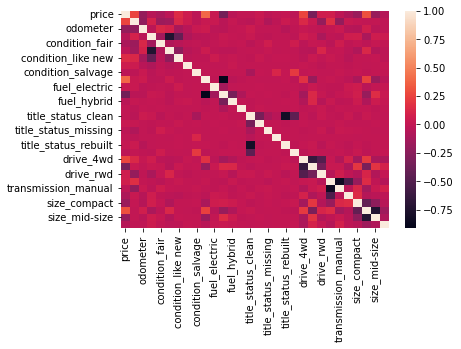

In [76]:
sns.heatmap(df2_full.corr())

In [77]:
#Model Building
#Split the dataset into 70-30 train and test datasets
X = df2_full.drop(['price'], axis =1)
y = df2_full.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [78]:
#Linear regression model
model = LinearRegression(fit_intercept = False)


In [79]:
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [80]:
print("Coefficient of the model: ",model.coef_)
print("Intercept of the model: ", model.intercept_)

Coefficient of the model:  [ 3.89392931e+02 -1.82000363e-02 -8.88053677e+04 -9.28466982e+04
 -8.89491978e+04 -8.38848096e+04 -8.08066205e+04 -9.31311281e+04
 -9.60443133e+04 -1.03055921e+05 -1.10310040e+05 -1.08475521e+05
 -1.10538027e+05 -8.72431909e+04 -8.37778851e+04 -8.64384378e+04
 -9.38572266e+04 -8.73514736e+04 -8.97556078e+04 -1.73754744e+05
 -1.80769005e+05 -1.73900072e+05 -1.74242349e+05 -1.70802792e+05
 -1.83378681e+05 -1.34147919e+05 -1.28566855e+05 -1.32667075e+05
 -1.33041973e+05]
Intercept of the model:  0.0


In [81]:
train_predict = model.predict(X_train)

In [82]:
train_predict

array([18629.58239018, 20986.66035673, 16145.87066983, ...,
       17307.43129035, 13643.34620608, 23130.531957  ])

In [83]:
score = model.score(X_train, y_train)

In [84]:
#Computing accuracy and RMSe of training model 
print ("Model score is:", round(score,2))
print ("MSE is:",round(np.sqrt(mean_squared_error(y_train, train_predict)),2))

Model score is: 0.36
MSE is: 10812.64


In [85]:
#Testing on test dataset
test_predict = model.predict(X_test)

In [86]:
mse = mean_squared_error(test_predict, y_test)
print ("MSE:", mse)

MSE: 110901443.83217807


In [87]:
coef = model.coef_
coef_norm = coef /coef.sum()

In [113]:
columns_=list(df2_full.columns)
columns_.remove('price')

In [114]:
for i, feature in enumerate (columns_):
    print (feature, coef_norm[i])

year -0.0001228309366953337
odometer 5.741058286863456e-09
condition_excellent 0.028012954604297688
condition_fair 0.029287760519130557
condition_good 0.028058324703766027
condition_like new 0.02646080326299427
condition_new 0.02548981272341539
condition_salvage 0.02937748171900198
fuel_diesel 0.03029642305044222
fuel_electric 0.03250817961055114
fuel_gas 0.034796434197550706
fuel_hybrid 0.03421774969798715
fuel_other 0.034868350976074304
title_status_clean 0.02752017824830985
title_status_lien 0.026427074775274798
title_status_missing 0.02726632521597281
title_status_parts only 0.02960652375192144
title_status_rebuilt 0.027554335160393698
title_status_salvage 0.028312700380734464
drive_4wd 0.05480956722825927
drive_fwd 0.05702216060473251
drive_rwd 0.05485540969961471
transmission_automatic 0.05496337821278736
transmission_manual 0.05387839690792605
transmission_other 0.057845362411892746
size_compact 0.04231590558281327
size_full-size 0.04055540306589244
size_mid-size 0.0418487851666

In [90]:
#the linear regression model indicates that transmission and drive affect the cost more than any other variable

In [121]:
#Linear regression with polynomial features
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the linear regression model on the polynomial features
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)

# Predict on the test set and evaluate the model
y_pred = lr_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)


R^2 score: 0.06870889549154013


In [122]:
# Linear Regression from polynomial features
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('Linear Regression R^2 score:', r2)
print('Linear Regression feature importance:')
print(pd.Series(lr_model.coef_, index=columns_).sort_values(ascending=False))

Linear Regression R^2 score: 0.3863890381843158
Linear Regression feature importance:
fuel_diesel                9640.451091
condition_new              7264.016518
transmission_manual        5338.482381
title_status_lien          4292.751892
condition_like new         4185.827406
size_full-size             3539.100203
fuel_electric              2628.843166
drive_4wd                  2386.529478
drive_rwd                  2241.201805
transmission_automatic     1898.925039
title_status_missing       1632.199122
title_status_clean          827.446029
title_status_rebuilt        719.163373
year                        389.392931
odometer                     -0.018200
size_mid-size              -561.119663
condition_excellent        -734.730688
condition_good             -878.560870
size_sub-compact           -936.017428
title_status_salvage      -1684.970827
size_compact              -2041.963112
fuel_hybrid               -2790.756526
fuel_gas                  -4625.275250
drive_fwd        

In [93]:
#Ridge regression with Grid Search CV
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
r2 = r2_score(y_test, ridge_test_preds)
### END SOLUTION

# ANSWER CHECK
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
print(f'R2 score: {r2}')


Train MSE: 122894785.91641404
Test MSE: 119461671.22421855
R2 score: 0.33902581925869135


In [94]:
#With the linear regression model, the Test MSE was high. The model score was 0.36, with year, odometer being less important than transmission and drive of the car
#With linear regression with polynomial features, the model score was higher, 0.38 with the condition of the car being new, fuel type diesel and transmission being most important for the price
#With Ridge regression using GridsearchCV, the R2 score was lower - 0.33

#While this is not an extensive analysis, it indicates that the condition of the car being new or like new, the transmission type and the fuel type have an impact on the price of the car
#We can see that this analysis with dropping all the null values yields somewhat different results from selectively dropping columns and evaluating the dataset used to train. Hence, exploring the data is an important step in this approach as much as modeling. 